<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/008(Data_Augumentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

####Preparing Data

In [2]:
tf.keras.utils.get_file("dataset", origin="https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip", cache_dir="./", extract=True)

68606236/68606236 [==============================] - 0s 0us/step


'./datasets/dataset'

In [3]:
training_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                                   rotation_range=40,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   zoom_range=0.2,
                                                                   shear_range=0.2,
                                                                   horizontal_flip=True,
                                                                   fill_mode="nearest")
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

training_data=training_generator.flow_from_directory("./datasets/cats_and_dogs_filtered/train/", target_size=(150,150), class_mode="binary", batch_size=20)
validation_data=valid_generator.flow_from_directory("./datasets/cats_and_dogs_filtered/validation/", target_size=(150,150), class_mode="binary", batch_size=20)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


####Creating Model

In [4]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(150,150,3)),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(strides=(2,2)),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(strides=(2,2)),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(strides=(2,2)),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(strides=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

history=model.fit(training_data, epochs=20, validation_data=validation_data)

Epoch 1/20
100/100 [==============================] - 27s 155ms/step - loss: 0.6963 - accuracy: 0.4905 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6928 - accuracy: 0.5365 - val_loss: 0.6711 - val_accuracy: 0.5950
Epoch 3/20
100/100 [==============================] - 24s 236ms/step - loss: 0.6819 - accuracy: 0.5765 - val_loss: 0.6537 - val_accuracy: 0.6520
Epoch 4/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6742 - accuracy: 0.5925 - val_loss: 0.6230 - val_accuracy: 0.6590
Epoch 5/20
100/100 [==============================] - 18s 179ms/step - loss: 0.6553 - accuracy: 0.6190 - val_loss: 0.5974 - val_accuracy: 0.6920
Epoch 6/20
100/100 [==============================] - 15s 146ms/step - loss: 0.6420 - accuracy: 0.6350 - val_loss: 0.5836 - val_accuracy: 0.6840
Epoch 7/20
100/100 [==============================] - 15s 149ms/step - loss: 0.6267 - accuracy: 0.6530 - val_loss: 0.6127 - val_ac

####Plotting History

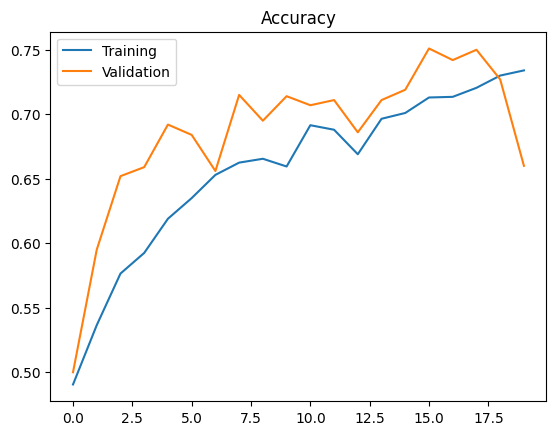

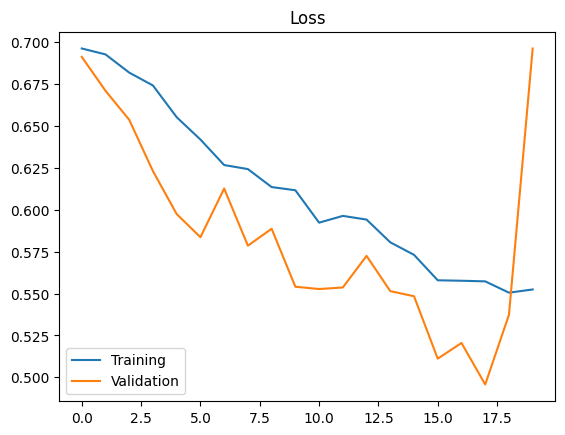

In [5]:
train_acc=history.history["accuracy"]
train_loss=history.history["loss"]

valid_acc=history.history["val_accuracy"]
valid_loss=history.history["val_loss"]

epochs=range(len(train_acc))

plt.plot(epochs, train_acc, label="Training")
plt.plot(epochs, valid_acc, label="Validation")
plt.title("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, label="Training")
plt.plot(epochs, valid_loss, label="Validation")
plt.title("Loss")
plt.legend()